# COGS 108 - Final Project 

# Overview

In this project, I explored the similarities and differences between regions in San Diego where there are clean parks and dirty parks. I also explored the similarities and differences within their own classification of clean parks and dirty parks. After the data analysis, I found that there was a positive relationship between the CES 2.0 score(overal pollution burden based on population characteristics) of a region and the percentage of the population in poverty. This suggests that as the poverty level increases, the pollution burden will also increase. 

# Name & GitHub

- Name: Andrew Truong
- GitHub Username: gnourtwerdna

# Research Question

How do the regions of clean parks in San Diego differ from the regions of dirty parks in San Diego based on their pollution burden, pesticide use, toxic chemical release, and poverty?

## Background and Prior Work

It costs money from the city to keep parks well maintained and clean. Low income areas would be unable to pay city maintenance workers to keep park facilities clean and in good condition. I want to explore how different regions are based on whether they have clean parks or dirty parks.

Reference 1: According to this study, moderate/high-income neighborhoods had better gymansiums, more space in activity centers, and better trash can maintenance. Low-income neighborhoods had more instances of negative aesthetics/incivilities like graffiti and drug use. This demonstrates a clear difference in facilities and aesthetics, so the difference in region could also be large.

Reference 2: The NPCA has classified the air pollution, hazy skies, and climate change impact of 12 national parks all over the US. There are clear differences between each of them in all of the categories, meaning that there is a clear difference in the regions that each park belongs to. This logic could be applied to San Diego parks as well and their regions. There could also be a difference in pollution burden between the regions of San Diego parks.

References (include links):
- 1) [Neighborhood Income Matters: Disparities in Community Recreation Facilities, Amenities, and Programs](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4082954/)
- 2) [Polluted Parks: How Dirty Air is Harming America’s National Parks](https://www.npca.org/resources/3137-polluted-parks-how-dirty-air-is-harming-america-s-national-parks)

# Hypothesis


I believe that there would be a clear difference between the regions of clean parks and dirty parks in all of those categories. I think that regions with clean parks would have less of a pollution burden than dirty parks because they are more well maintained. I think regions with cleaner parks would have less pesticides use because the run off from pesticides would make parks dirtier. I think there would be more toxical chemical release in regions with dirty parks because this would make a park more dirty. I think that regions with clean parks would have less poverty than regions with dirty parks because of maintenance costs.

# Datasets

The following datasets were provided by the instructor so there are no links to them. I plan to merge the two datasets based on the latitude/longitude column of each dataset.

### Yelp Park Data of San Diego Parks

The yelp_SD_parks.csv dataset has 833 observations The observations are of all kinds of establiments with their overall rating based on the number of reviews. Some extra info on these establishments are their address, phone number, longtitude/latitude, and status of operation.

### Cal Enviro Screen 2.0 Report

The calenviroscreen-final-report.csv had 8035 observations. There were a total of 52 columns that described census tract's condition in things like water pollution, pesticides, and toxic waste. The pollution burden and population characteristics are taken into account for the CES 2.0 score that is assigned to each centrus tract. This score is used in the CES 2.0 percentile range where the scores are compared to each other and put into a percentile. The percentiles are in 10 percent increments(10%, 11% - 20%, 21% - 30% ..., 91% - 100%). A score of in the 91%-100% range would be in high spectrum(high pollution) and a score in the 10% range would be in the bottom spectrum(low pollution). The toxic release value is the concentration of chemical releases within that census tract. The pesticide value is the total pounds used in production-agriculture per square mile within the census tract. The poverty value is the percent of population living below two times the federal poverty level.

# Setup

In [1]:
# Imports
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Data/Plotting
import pandas as pd
#import geopandas as gpd
import numpy as np
import seaborn as sns
sns.set()
sns.set_context('talk')
import matplotlib.pyplot as plt

# Data Loading

In [2]:
# Reads the csv files into a dataframe
df_parks = pd.read_csv('../data/yelp_SD_parks.csv')
df_ces = pd.read_csv('../data/calenviroscreen-final-report.csv')

In [3]:
# Preview of the parks data before cleaning
df_parks.head()

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False


In [4]:
# Preview of the CES data before cleaning
df_ces.head()

,Census Tract,Total Population,California County,Click for interactive map,CES 2.0 Score,CES 2.0 Percentile Range,Hyperlink,Ozone,Ozone Pctl,PM2.5,...,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,Location 1
0,6019001100,3174,Fresno,NaN,89.22,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.255228,80.87,14.746087,...,21.6,83.66,77.500865,97.78,19.30,92.05,90.072268,9.360658,99.60,"Fresno 93706\n(36.709695199999999, -119.7816961)"
1,6019000300,3609,Fresno,NaN,83.71,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.287130,83.28,14.619618,...,18.3,78.34,81.204032,98.93,NaN,NaN,92.323243,9.594592,99.90,"Fresno 93706\n(36.726461999999998, -119.8010347)"
2,6019000200,3167,Fresno,NaN,83.47,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.304446,84.40,14.554656,...,16.2,74.04,86.828423,99.66,25.27,98.14,91.499039,9.508958,99.80,"Fresno 93706\n(36.735491400000001, -119.8055044)"
3,6019001500,2206,Fresno,NaN,83.08,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.225687,78.25,14.937649,...,19.5,80.68,62.746088,88.32,18.30,89.60,83.474281,8.674967,97.74,"Fresno 93725\n(36.681600000000003, -119.717842..."
4,6019000600,6161,Fresno,NaN,82.95,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.327935,85.81,14.506413,...,16.9,75.49,88.680993,99.79,26.69,98.61,92.246260,9.586590,99.89,"Fresno 93721\n(36.743062999999999, -119.7933565)"


# Data Cleaning

### Removing Columns

I only need the name, longitude, and latitude in the parks dataset.

In [5]:
df_parks = df_parks[['name', 'latitude', 'longitude']]
df_parks.head()

,name,latitude,longitude
0,Balboa Park,32.734502,-117.153150
1,Civita Park,32.778315,-117.147278
2,Waterfront Park,32.721952,-117.172479
3,Trolley Barn Park,32.762463,-117.143789
4,Bay View Park,32.701785,-117.178967


In the CES dataset, I will only need to focus on the CES 2.0 score, CES 2.0 percentile range, and location. I'm also adding on toxic release, pesticides, and poverty for the focus of my question.

In [6]:
df_ces = df_ces[['Census Tract',
                 'CES 2.0 Score',
                 'CES 2.0 Percentile Range',
                 'Pesticides',
                 'Tox. Release',
                 'Poverty',
                 'Location 1']]
df_ces.head()

,Census Tract,CES 2.0 Score,CES 2.0 Percentile Range,Pesticides,Tox. Release,Poverty,Location 1
0,6019001100,89.22,96-100% (highest scores),5.470140,96414.458370,77.500865,"Fresno 93706\n(36.709695199999999, -119.7816961)"
1,6019000300,83.71,96-100% (highest scores),37.749178,19637.972100,81.204032,"Fresno 93706\n(36.726461999999998, -119.8010347)"
2,6019000200,83.47,96-100% (highest scores),11.696444,11826.724940,86.828423,"Fresno 93706\n(36.735491400000001, -119.8055044)"
3,6019001500,83.08,96-100% (highest scores),2105.763777,5846.924529,62.746088,"Fresno 93725\n(36.681600000000003, -119.717842..."
4,6019000600,82.95,96-100% (highest scores),568.112511,7158.199033,88.680993,"Fresno 93721\n(36.743062999999999, -119.7933565)"


To match the census tract and park in my analysis later, I will need to match the latitude and longitude of the parks and CES dataset. I will start by removing the city name and zip code in Location 1, and then separate the longitude and latitude.

In [7]:
# Assigns the text in between the parentheses to latlon
latlon = df_ces['Location 1'].apply(lambda st: st[st.find('(')+1:st.find(')')])
# Adds latlon as a new column
df_ces['latlon'] = latlon

In [8]:
# Splits the text before the comma and after the comma
lat = df_ces['latlon'].str.split(',').str[0].tolist()
lon = df_ces['latlon'].str.split(',').str[1].tolist()
# Adds lat and lon as new columns
df_ces['lat'] = lat
df_ces['lon'] = lon
df_ces.head()

,Census Tract,CES 2.0 Score,CES 2.0 Percentile Range,Pesticides,Tox. Release,Poverty,Location 1,latlon,lat,lon
0,6019001100,89.22,96-100% (highest scores),5.470140,96414.458370,77.500865,"Fresno 93706\n(36.709695199999999, -119.7816961)","36.709695199999999, -119.7816961",36.709695199999999,-119.7816961
1,6019000300,83.71,96-100% (highest scores),37.749178,19637.972100,81.204032,"Fresno 93706\n(36.726461999999998, -119.8010347)","36.726461999999998, -119.8010347",36.726461999999998,-119.8010347
2,6019000200,83.47,96-100% (highest scores),11.696444,11826.724940,86.828423,"Fresno 93706\n(36.735491400000001, -119.8055044)","36.735491400000001, -119.8055044",36.735491400000001,-119.8055044
3,6019001500,83.08,96-100% (highest scores),2105.763777,5846.924529,62.746088,"Fresno 93725\n(36.681600000000003, -119.717842...","36.681600000000003, -119.71784270000001",36.681600000000003,-119.71784270000001
4,6019000600,82.95,96-100% (highest scores),568.112511,7158.199033,88.680993,"Fresno 93721\n(36.743062999999999, -119.7933565)","36.743062999999999, -119.7933565",36.743062999999999,-119.7933565


Now that I have the latitude and longitude, I can remove Location 1 and latlon.

In [9]:
df_ces = df_ces.drop(columns = ['Location 1', 'latlon'])
df_ces.head()

,Census Tract,CES 2.0 Score,CES 2.0 Percentile Range,Pesticides,Tox. Release,Poverty,lat,lon
0,6019001100,89.22,96-100% (highest scores),5.470140,96414.458370,77.500865,36.709695199999999,-119.7816961
1,6019000300,83.71,96-100% (highest scores),37.749178,19637.972100,81.204032,36.726461999999998,-119.8010347
2,6019000200,83.47,96-100% (highest scores),11.696444,11826.724940,86.828423,36.735491400000001,-119.8055044
3,6019001500,83.08,96-100% (highest scores),2105.763777,5846.924529,62.746088,36.681600000000003,-119.71784270000001
4,6019000600,82.95,96-100% (highest scores),568.112511,7158.199033,88.680993,36.743062999999999,-119.7933565


### Renaming Columns

Renaming latitude and longitude in parks dataset to merge with CES dataset later.

In [10]:
df_parks.rename(columns = {'longitude':'lon'}, inplace = True)
df_parks.rename(columns = {'latitude':'lat'}, inplace = True)
df_parks.head()

,name,lat,lon
0,Balboa Park,32.734502,-117.153150
1,Civita Park,32.778315,-117.147278
2,Waterfront Park,32.721952,-117.172479
3,Trolley Barn Park,32.762463,-117.143789
4,Bay View Park,32.701785,-117.178967


Renaming CES 2.0 Score and CES 2.0 Percentile Range for easier references later.

In [11]:
df_ces.rename(columns = {'CES 2.0 Score':'score'}, inplace = True)
df_ces.rename(columns = {'CES 2.0 Percentile Range':'p_range'}, inplace = True)
df_ces.rename(columns = {'Census Tract':'census_tract'}, inplace = True)
df_ces.rename(columns = {'Tox. Release':'tox_release'}, inplace = True)
df_ces.rename(columns = {'Pesticides':'pesticides'}, inplace = True)
df_ces.rename(columns = {'Poverty':'poverty'}, inplace = True)

df_ces.head()

,census_tract,score,p_range,pesticides,tox_release,poverty,lat,lon
0,6019001100,89.22,96-100% (highest scores),5.470140,96414.458370,77.500865,36.709695199999999,-119.7816961
1,6019000300,83.71,96-100% (highest scores),37.749178,19637.972100,81.204032,36.726461999999998,-119.8010347
2,6019000200,83.47,96-100% (highest scores),11.696444,11826.724940,86.828423,36.735491400000001,-119.8055044
3,6019001500,83.08,96-100% (highest scores),2105.763777,5846.924529,62.746088,36.681600000000003,-119.71784270000001
4,6019000600,82.95,96-100% (highest scores),568.112511,7158.199033,88.680993,36.743062999999999,-119.7933565


### Checking for Missing Values and Other Values

I went through the data beforehand and noticed that there were many entries that were not parks, so I needed to only keep the parks. I also caught a parking structure in the dataset so let's remove those as well.

In [12]:
df_parks = df_parks[df_parks['name'].str.contains('Park')]
df_parks = df_parks[~df_parks['name'].str.contains('Parking')]

Let's make sure that there are no missing values in both datasets.

In [13]:
# Checks for missing values
df_parks.isnull().sum()

name    0
lat     1
lon     1
dtype: int64

In [14]:
df_parks[df_parks['lon'].isna()]

,name,lat,lon
226,Officer Christopher Wilson Memorial Park,NaN,NaN


In [15]:
# Removes missing values
df_parks = df_parks.dropna(how='any',axis=0)

In [16]:
df_ces.isnull().sum()

census_tract      0
score            62
p_range          62
pesticides        0
tox_release      12
poverty         102
lat               0
lon               0
dtype: int64

There seems to be a lot of missing values in the CES dataset so let's look at that.

In [17]:
df_ces[df_ces['score'].isna()]

,census_tract,score,p_range,pesticides,tox_release,poverty,lat,lon
7973,6001422600,NaN,NaN,0.000000,480.970178,NaN,37.8738125,-122.2545472
7974,6001981900,NaN,NaN,0.000000,248.664018,NaN,37.803357300000002,-122.3198955
7975,6001982000,NaN,NaN,0.000000,265.402977,NaN,37.796125799999999,-122.2943959
7976,6019007901,NaN,NaN,0.323199,195.253261,NaN,36.130064699999998,-120.24303930000001
7977,6029004302,NaN,NaN,138.466521,67.643156,NaN,35.590573399999997,-119.4116611
...,...,...,...,...,...,...,...,...
8030,6085504700,NaN,NaN,0.009449,353.899636,NaN,37.416475499999997,-122.04972359999999
8031,6095253000,NaN,NaN,0.000000,284.887744,NaN,38.320655700000003,-121.97878470000001
8032,6095980000,NaN,NaN,0.000000,376.639158,NaN,38.254451500000002,-121.9456515
8033,6109985202,NaN,NaN,0.000000,51.341503,NaN,37.8919389,-120.5370715


Since I will be analyzing the actual values in the columns with NaN values, I won't be able to use the NaN values. So I will drop all missing values from the dataset.

In [18]:
df_ces = df_ces.dropna(how='any',axis=0)

Now that the datasets are mostly clean, I can begin matching the CES and parks dataset based on their latitude/longitude.

### Initial Matching

I need all of my latitude and longitude values as floats, so let's make sure of that.

In [19]:
df_ces.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7920 entries, 0 to 7972
Data columns (total 8 columns):
census_tract    7920 non-null int64
score           7920 non-null float64
p_range         7920 non-null object
pesticides      7920 non-null float64
tox_release     7920 non-null float64
poverty         7920 non-null float64
lat             7920 non-null object
lon             7920 non-null object
dtypes: float64(4), int64(1), object(3)
memory usage: 556.9+ KB


In [20]:
df_parks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 831
Data columns (total 3 columns):
name    273 non-null object
lat     273 non-null float64
lon     273 non-null float64
dtypes: float64(2), object(1)
memory usage: 8.5+ KB


The latitude and longitude in the CES dataset are objects and I need them as floats.

In [21]:
df_ces = df_ces.astype({'lat': float})

In [22]:
df_ces = df_ces.astype({'lon': float})

In [23]:
df_ces.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7920 entries, 0 to 7972
Data columns (total 8 columns):
census_tract    7920 non-null int64
score           7920 non-null float64
p_range         7920 non-null object
pesticides      7920 non-null float64
tox_release     7920 non-null float64
poverty         7920 non-null float64
lat             7920 non-null float64
lon             7920 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 556.9+ KB


Now it looks like our data is mostly clean, so now I can match the parks' latitude/longitude to a census tracts' latitude/longitude. I will be using https://medium.com/analytics-vidhya/finding-nearest-pair-of-latitude-and-longitude-match-using-python-ce50d62af546 for their algorithm to match names from one dataset to a latitude/longitude in another dataset.

In [24]:
from math import radians, cos, sin, asin, sqrt
def dist(lat1, long1, lat2, long2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lat1, long1, lat2, long2 = map(radians, [lat1, long1, lat2, long2])
    # haversine formula 
    dlon = long2 - long1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [25]:
def find_nearest(lat, long):
    distances = df_ces.apply(
        lambda row: dist(lat, long, row['lat'], row['lon']), 
        axis=1)
    return df_ces.loc[distances.idxmin(), 'census_tract']

In [26]:
df_parks['census_tract'] = df_parks.apply(
    lambda row: find_nearest(row['lat'], row['lon']), 
    axis=1)
df_parks.head()

,name,lat,lon,census_tract
0,Balboa Park,32.734502,-117.153150,6073005600
1,Civita Park,32.778315,-117.147278,6073009202
2,Waterfront Park,32.721952,-117.172479,6073005800
3,Trolley Barn Park,32.762463,-117.143789,6073001000
4,Bay View Park,32.701785,-117.178967,6073011100


In [27]:
df_stats = df_parks.merge(df_ces, on = 'census_tract', how='left')
df_stats.head()

,name,lat_x,lon_x,census_tract,score,p_range,pesticides,tox_release,poverty,lat_y,lon_y
0,Balboa Park,32.734502,-117.153150,6073005600,24.24,51-55%,2.185167,114.864779,27.084531,32.730388,-117.147224
1,Civita Park,32.778315,-117.147278,6073009202,17.56,31-35%,0.000226,75.032680,15.052969,32.786036,-117.142884
2,Waterfront Park,32.721952,-117.172479,6073005800,20.19,41-45%,0.000000,141.547031,25.458805,32.724903,-117.170590
3,Trolley Barn Park,32.762463,-117.143789,6073001000,13.44,21-25%,17.437719,64.243470,26.738586,32.760333,-117.141732
4,Bay View Park,32.701785,-117.178967,6073011100,7.72,6-10%,0.000000,194.901918,8.408250,32.697382,-117.178578


Each park has been matched with its closest census tract and I can clean it up further to get the general CES stats of each park. I will keep lat_x and lon_x for the locations of each park.

In [28]:
df_stats = df_stats.drop(columns = ['lat_y', 'lon_y', 'census_tract'])
df_stats.rename(columns = {'lat_x':'lat'}, inplace = True)
df_stats.rename(columns = {'lon_x':'lon'}, inplace = True)
df_stats.head()

,name,lat,lon,score,p_range,pesticides,tox_release,poverty
0,Balboa Park,32.734502,-117.153150,24.24,51-55%,2.185167,114.864779,27.084531
1,Civita Park,32.778315,-117.147278,17.56,31-35%,0.000226,75.032680,15.052969
2,Waterfront Park,32.721952,-117.172479,20.19,41-45%,0.000000,141.547031,25.458805
3,Trolley Barn Park,32.762463,-117.143789,13.44,21-25%,17.437719,64.243470,26.738586
4,Bay View Park,32.701785,-117.178967,7.72,6-10%,0.000000,194.901918,8.408250


Now each park has stats related to the census tract region it is within and I can begin analysis.

# Data Analysis & Results

Since there are no sources online that explain what scores are considered bad or good in terms of cleanliness, I will use the percentile ranges instead to get a relative comparison between better or worse scores. First I will convert the percentile range to be on a scale from 0 to 9 to be easier to handle and analyze. Scores at the 50th percentile and below will be considered clean, and scores above the 50th percentile will be considered dirty.

In [29]:
def convertRange(r):
    # map onto a range from 0 to 9
    temp = r.split('%')
    nums = temp[0].split('-')

    return int(nums[0] ) // 10

In [30]:
df_stats['scale'] = df_stats['p_range'].apply(convertRange)
df_stats.head()

,name,lat,lon,score,p_range,pesticides,tox_release,poverty,scale
0,Balboa Park,32.734502,-117.153150,24.24,51-55%,2.185167,114.864779,27.084531,5
1,Civita Park,32.778315,-117.147278,17.56,31-35%,0.000226,75.032680,15.052969,3
2,Waterfront Park,32.721952,-117.172479,20.19,41-45%,0.000000,141.547031,25.458805,4
3,Trolley Barn Park,32.762463,-117.143789,13.44,21-25%,17.437719,64.243470,26.738586,2
4,Bay View Park,32.701785,-117.178967,7.72,6-10%,0.000000,194.901918,8.408250,0


In [31]:
def isClean(scale):
    if scale >= 5:
        return False
    else:
        return True

In [32]:
df_stats['is_clean'] = df_stats['scale'].apply(isClean)
df_stats.head()

,name,lat,lon,score,p_range,pesticides,tox_release,poverty,scale,is_clean
0,Balboa Park,32.734502,-117.153150,24.24,51-55%,2.185167,114.864779,27.084531,5,False
1,Civita Park,32.778315,-117.147278,17.56,31-35%,0.000226,75.032680,15.052969,3,True
2,Waterfront Park,32.721952,-117.172479,20.19,41-45%,0.000000,141.547031,25.458805,4,True
3,Trolley Barn Park,32.762463,-117.143789,13.44,21-25%,17.437719,64.243470,26.738586,2,True
4,Bay View Park,32.701785,-117.178967,7.72,6-10%,0.000000,194.901918,8.408250,0,True


Let's first take a look at the general stats of each dataset.

In [33]:
df_parks.describe()

,lat,lon,census_tract
count,273.000000,273.000000,2.730000e+02
mean,32.862881,-117.167792,6.072118e+09
std,0.242052,0.181787,5.047442e+06
min,32.545792,-118.314405,6.037403e+09
25%,32.740450,-117.212504,6.073005e+09
50%,32.797596,-117.147776,6.073008e+09
75%,32.935850,-117.086876,6.073013e+09
max,34.142907,-116.377618,6.073022e+09


In [34]:
df_ces.describe()

,census_tract,score,pesticides,tox_release,poverty,lat,lon
count,7.920000e+03,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000
mean,6.054960e+09,26.660394,289.392496,2957.199373,35.277239,35.498247,-119.411802
std,2.657403e+07,14.663005,2612.332537,13640.895529,20.164756,2.087599,1.977097
min,6.001400e+09,1.610000,0.000000,0.000002,0.000000,32.547376,-124.297889
25%,6.037262e+09,14.917500,0.000000,64.526160,18.380640,33.924542,-121.523289
50%,6.059053e+09,23.800000,0.000000,339.423306,31.989969,34.204692,-118.429238
75%,6.073017e+09,36.692500,0.487635,2520.118604,50.353184,37.636686,-117.922234
max,6.115041e+09,89.220000,86025.509810,758910.748800,99.074074,41.946648,-114.306484


In [35]:
df_stats.describe()

,lat,lon,score,pesticides,tox_release,poverty,scale
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,32.862881,-117.167792,17.028242,2.350491,697.395875,28.281291,2.509158
std,0.242052,0.181787,9.621381,13.832859,5774.436209,18.016626,2.249368
min,32.545792,-118.314405,2.930000,0.000000,0.016871,3.119333,0.000000
25%,32.740450,-117.212504,9.340000,0.000000,39.498568,15.382395,0.000000
50%,32.797596,-117.147776,15.620000,0.000000,63.727131,24.775322,2.000000
75%,32.935850,-117.086876,20.430000,0.000956,115.740076,39.119858,4.000000
max,34.142907,-116.377618,59.910000,193.329616,92746.064290,84.891835,9.000000


### CES 2.0 Score Analysis

Even though I do not plan to use raw scores for comparison and analysis, I want to get an idea of the range of values the percentiles cover.

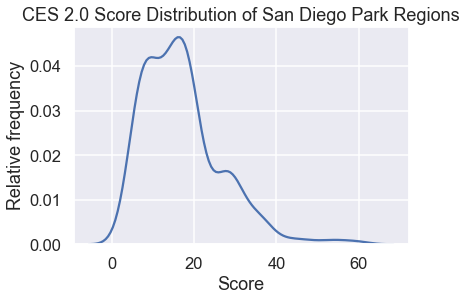

In [36]:
score_dist = sns.distplot(df_stats['score'], bins = 25, hist = False)

score_dist.set_title('CES 2.0 Score Distribution of San Diego Park Regions')
score_dist.set_xlabel('Score')
score_dist.set_ylabel('Relative frequency')

None

I can see that the CES 2.0 scores that occur the most in the dataset are around 10-20

In [37]:
df_stats[(df_stats['score'] < 20)]

,name,lat,lon,score,p_range,pesticides,tox_release,poverty,scale,is_clean
1,Civita Park,32.778315,-117.147278,17.56,31-35%,0.000226,75.032680,15.052969,3,True
3,Trolley Barn Park,32.762463,-117.143789,13.44,21-25%,17.437719,64.243470,26.738586,2,True
4,Bay View Park,32.701785,-117.178967,7.72,6-10%,0.000000,194.901918,8.408250,0,True
7,Kate O Sessions Memorial Park,32.811316,-117.239898,5.83,1-5% (lowest scores),0.000000,28.226000,9.927361,0,True
8,Murray Ridge Neighborhood Park,32.791312,-117.148097,17.56,31-35%,0.000226,75.032680,15.052969,3,True
...,...,...,...,...,...,...,...,...,...,...
266,Saratoga Avenue Kid's Park,32.745191,-117.244970,5.30,1-5% (lowest scores),0.000000,41.609441,25.109170,0,True
268,Spreckels Park,32.690827,-117.176320,7.36,1-5% (lowest scores),0.000000,179.676172,17.555556,0,True
269,Pioneer Park,33.029802,-117.115723,11.94,16-20%,2.802166,34.901749,4.918773,1,True
270,Capehart Dog Park,32.807007,-117.225335,10.43,11-15%,0.000000,30.690435,40.529896,1,True


This means that most parks in San Diego are in regions that are considered clean, with less pollution. Let's take a look at how the scores of clean parks are distributed vs how the scores of dirty parks are distributed. 

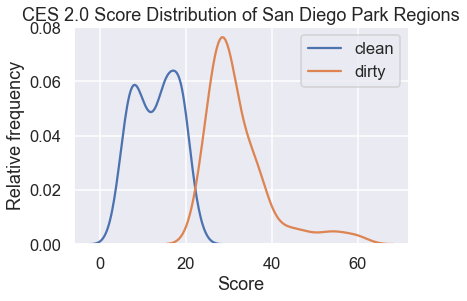

In [38]:
score_dist = sns.distplot(df_stats.loc[df_stats['is_clean'] == True]['score'], bins = 25 , label = 'clean', hist = False)
score_dist2 = sns.distplot(df_stats.loc[df_stats['is_clean'] == False]['score'], bins = 25, label= 'dirty', ax = score_dist, hist = False)

score_dist.set_title('CES 2.0 Score Distribution of San Diego Park Regions')
score_dist.set_xlabel('Score')
score_dist.set_ylabel('Relative frequency')
plt.legend()

None

Since there was a classification of clean/dirty based on the percentile range, there's a clear difference between clean and dirty parks in terms of the distribution of CES 2.0 scores.

### Percentile Range Analysis

The scale is used to make looking at percentile range easier. (scale of 0 = percentile range of 0%-10%, scale of 1 = percentile range of 11%-20%, scale of 2 = percentile range of 21%-30%, ..., scale of 9 = percentile range of 91%-100%)

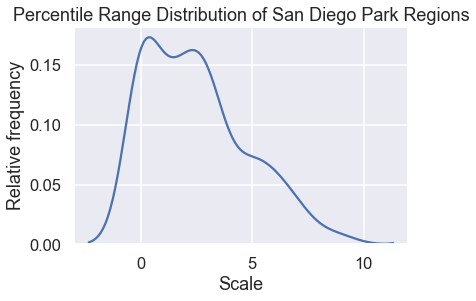

In [39]:
range_dist = sns.distplot(df_stats['scale'], bins = 25, hist = False)

range_dist.set_title('Percentile Range Distribution of San Diego Park Regions')
range_dist.set_xlabel('Scale')
range_dist.set_ylabel('Relative frequency')

None

This density plot of the percentiles looks a lot like the first plot I made of all of the CES 2.0 scores. The highest frequencies appear to be around 0-3 on the scale, which translates to most of the CES 2.0 scores occurring within the 0-30th percentile range.

Next, let's split the percentiles into clean and dirty for visualization.

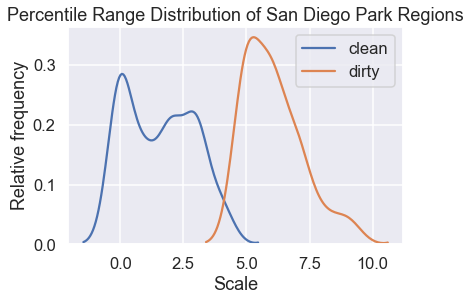

In [40]:
range_dist = sns.distplot(df_stats.loc[df_stats['is_clean'] == True]['scale'], bins = 25 , label = 'clean', hist = False)
range_dist2 = sns.distplot(df_stats.loc[df_stats['is_clean'] == False]['scale'], bins = 25, label= 'dirty', ax = range_dist, hist = False)

range_dist.set_title('Percentile Range Distribution of San Diego Park Regions')
range_dist.set_xlabel('Scale')
range_dist.set_ylabel('Relative frequency')
plt.legend()

None

It looks like most clean parks in San Diego are in regions where the scale is 0 and 3. This means that most clean parks are in the bottom 10% percentile range and the 31%-40% percentile range. The 10% percentile range meaning that most clean parks have the lowest pollution burden and the 31%-40% percentile range meaning that their pollution burden is less than the other 60% of regions. Most dirty parks have a scale near 5, where the percentile range is 51%-60%. 

### Pesticide Levels Analysis

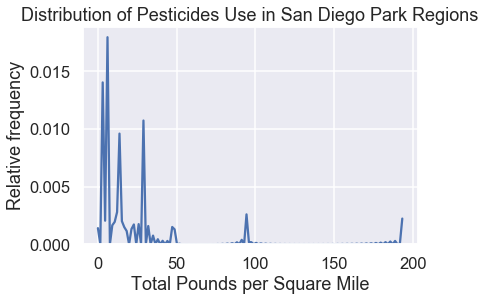

In [41]:
pest_dist = sns.distplot(df_stats['pesticides'], bins = 25, hist = False)

pest_dist.set_title('Distribution of Pesticides Use in San Diego Park Regions')
pest_dist.set_xlabel('Total Pounds per Square Mile')
pest_dist.set_ylabel('Relative frequency')

None

I can see that most parks in San Diego are in regions with a relatively low amount of pesticide use. However, there seems to be a few outliers. Let's take a look at them.

In [42]:
df_stats[df_stats['pesticides'] > 50]

,name,lat,lon,score,p_range,pesticides,tox_release,poverty,scale,is_clean
148,Encinitas Community Park,33.032475,-117.280780,27.43,56-60%,94.791444,36.252744,42.799378,5,False
272,Ann D. L'Heureux Memorial Dog Park,33.171137,-117.316419,8.43,6-10%,193.329616,51.582037,13.917526,0,True


Encinitas Community Park and Ann D. L'Heureux Memorial Dog Park are in regions where there is a large use of pesticides. Interestingly enough, Ann D. L'Heureux Memorial Dog Park is in a region with the most use of pesticides, but has a score in the percentile range of 6%-10%. That means this park is in a region that is considered to have the lowest pollution burden. Surprisingly, Encinitas Community Park has half the total pounds of pesticides used per square mile, but has a score that puts the region in the 56%-60% percentile range that would be considered dirty. Let's see how the distribution looks like without the 2 outliers.

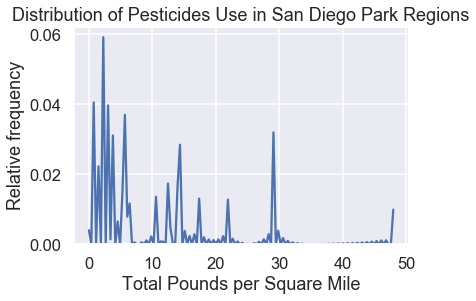

In [43]:
pest_dist = sns.distplot(df_stats.loc[df_stats['pesticides'] < 50, 'pesticides'], bins = 25, hist = False)

pest_dist.set_title('Distribution of Pesticides Use in San Diego Park Regions')
pest_dist.set_xlabel('Total Pounds per Square Mile')
pest_dist.set_ylabel('Relative frequency')

None

Even with removing the extreme outliers, there are still a few outliers that skew the distribution a bit. The main takeaway is that most parks in San Diego are in regions where the total pounds of pesticides used per square mile is around 0 to 5. Let's take a look at how it is distributed with cleanliness classification.

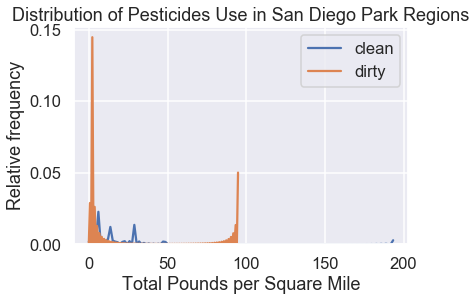

In [44]:
pest_dist = sns.distplot(df_stats.loc[df_stats['is_clean'] == True]['pesticides'], bins = 25 , label = 'clean', hist = False)
pest_dist2 = sns.distplot(df_stats.loc[df_stats['is_clean'] == False]['pesticides'], bins = 25, label= 'dirty', ax = pest_dist, hist = False)

pest_dist.set_title('Distribution of Pesticides Use in San Diego Park Regions')
pest_dist.set_xlabel('Total Pounds per Square Mile')
pest_dist.set_ylabel('Relative frequency')
plt.legend()

None

The outliers skew the distribution so let's remove them first.

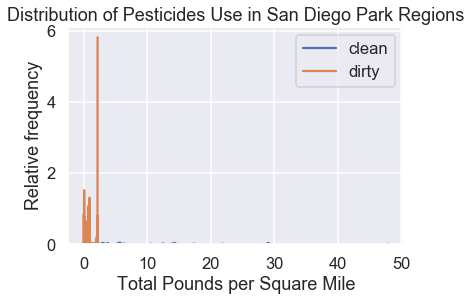

In [45]:
pest_dist = sns.distplot(df_stats.loc[(df_stats['is_clean'] == True) & (df_stats['pesticides'] < 50)]['pesticides'], bins = 25 , label = 'clean', hist = False)
pest_dist2 = sns.distplot(df_stats.loc[(df_stats['is_clean'] == False) & (df_stats['pesticides'] < 50)]['pesticides'], bins = 25, label= 'dirty', ax = pest_dist, hist = False)

pest_dist.set_title('Distribution of Pesticides Use in San Diego Park Regions')
pest_dist.set_xlabel('Total Pounds per Square Mile')
pest_dist.set_ylabel('Relative frequency')
plt.legend()
None

The difference in pesticides use is too big between the regions of clean and dirty parks. Let's separate them to see a better distribution.

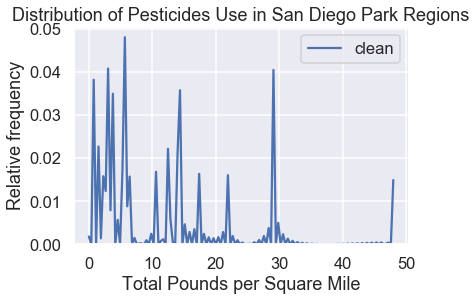

In [46]:
pest_dist = sns.distplot(df_stats.loc[(df_stats['is_clean'] == True) & (df_stats['pesticides'] < 50)]['pesticides'], bins = 25 , label = 'clean', hist = False)

pest_dist.set_title('Distribution of Pesticides Use in San Diego Park Regions')
pest_dist.set_xlabel('Total Pounds per Square Mile')
pest_dist.set_ylabel('Relative frequency')
plt.legend()

None

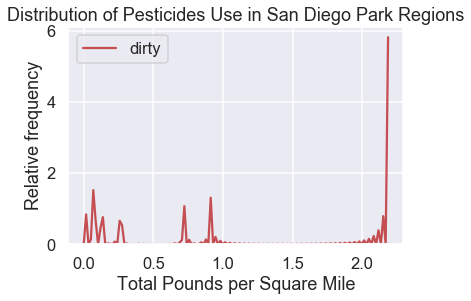

In [47]:
pest_dist = sns.distplot(df_stats.loc[(df_stats['is_clean'] == False) & (df_stats['pesticides'] < 50)]['pesticides'], bins = 25 , label = 'dirty', hist = False, color = 'r')

pest_dist.set_title('Distribution of Pesticides Use in San Diego Park Regions')
pest_dist.set_xlabel('Total Pounds per Square Mile')
pest_dist.set_ylabel('Relative frequency')
plt.legend()

None

I can see that most clean parks are in regions where 5 total pounds of pesticides are used per square mile. In contrast, most dirty parks are in regions where there is about 2.3 total pounds of pesticides used per square mile. This shows that most clean parks have 2 times the use of pesticides than dirty parks, which is a very interesting observation.

### Toxic Release Analysis

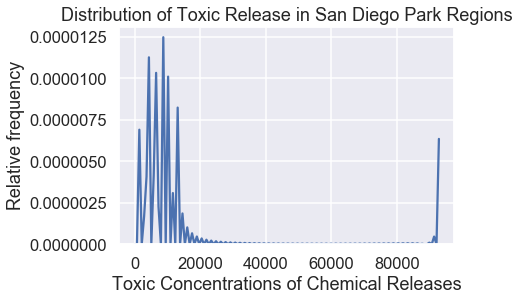

In [48]:
tox_dist = sns.distplot(df_stats['tox_release'], bins = 25, hist = False)

tox_dist.set_title('Distribution of Toxic Release in San Diego Park Regions')
tox_dist.set_xlabel('Toxic Concentrations of Chemical Releases')
tox_dist.set_ylabel('Relative frequency')

None

Most parks in San Diego are in regions that have toxic release concentrations below 20000. Let's look at the outlier, the park in a region with most toxic concentrations.

In [49]:
df_stats[df_stats['tox_release'] > 20000]

,name,lat,lon,score,p_range,pesticides,tox_release,poverty,scale,is_clean
104,Encanto Park,34.142907,-117.938061,35.99,71-75%,0.266358,92746.06429,27.278029,7,False


Encanto Park is a region with the highest toxic release concentration. The park is dirty and has a pretty high percentile range of 71%-75%. There are no other parks in regions with a toxic release value of over 20000. Let's see how it is distributed without the outlier.

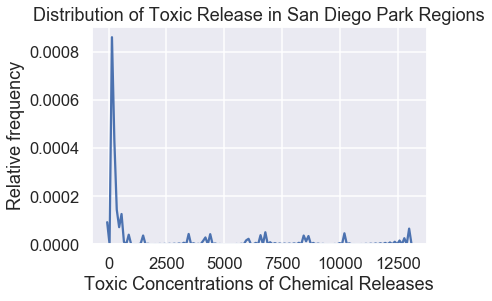

In [50]:
tox_dist = sns.distplot(df_stats.loc[df_stats['tox_release'] < 20000, 'tox_release'], bins = 25, hist = False)

tox_dist.set_title('Distribution of Toxic Release in San Diego Park Regions')
tox_dist.set_xlabel('Toxic Concentrations of Chemical Releases')
tox_dist.set_ylabel('Relative frequency')

None

It looks like most parks are in regions with a toxic release value well below 2500. I'll remove all outliers beyond 1000.

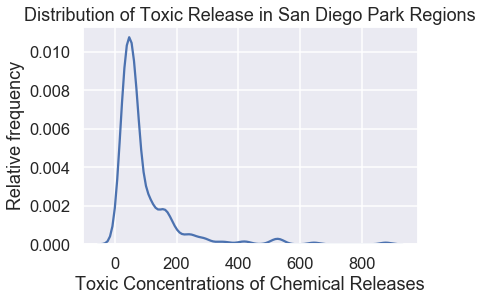

In [51]:
tox_dist = sns.distplot(df_stats.loc[df_stats['tox_release'] < 1000, 'tox_release'], bins = 25, hist = False)

tox_dist.set_title('Distribution of Toxic Release in San Diego Park Regions')
tox_dist.set_xlabel('Toxic Concentrations of Chemical Releases')
tox_dist.set_ylabel('Relative frequency')

None

There is a decent distribution now, and from it I can tell that the most common toxic release levels are around 50 to 100. Let's see how the outliers look.

In [52]:
df_stats[df_stats['tox_release'] > 1000]

,name,lat,lon,score,p_range,pesticides,tox_release,poverty,scale,is_clean
93,Chicano Park,32.698370,-117.141790,59.91,96-100% (highest scores),0.000000,4410.638376,74.855946,9,False
100,Memorial Park,33.719057,-117.878387,30.48,61-65%,0.079066,8457.041595,43.563941,6,False
104,Encanto Park,34.142907,-117.938061,35.99,71-75%,0.266358,92746.064290,27.278029,7,False
113,Lomita Park,33.803455,-118.314405,27.50,56-60%,0.000000,6598.828169,24.744186,5,False
134,Los Altos Park,33.796591,-118.127696,14.40,21-25%,3.566935,10196.523120,12.409701,2,True
138,Vista Pacifica Park,32.581191,-117.005666,18.75,36-40%,1.985957,1472.898595,16.755873,3,True
140,Kellogg Park,33.863342,-117.558147,22.00,46-50%,0.000000,3477.456813,29.441474,4,True
172,Rolling Hills Park,33.900170,-117.899939,20.53,41-45%,0.000000,8600.426973,14.759169,4,True
207,Mesa Verde Park,33.675310,-117.931579,11.33,11-15%,0.000000,4140.446412,9.771097,1,True
210,Lakeview Park,33.942048,-118.087036,44.85,86-90%,0.021197,6763.396627,20.211772,8,False


These parks are in regions where there are a high amount of toxic concentrations. There is a good mix between clean parks and dirty parks in these regions which is quite interesting. Let's see how the distribution looks when we split clean parks and dirty parks without the outliers.

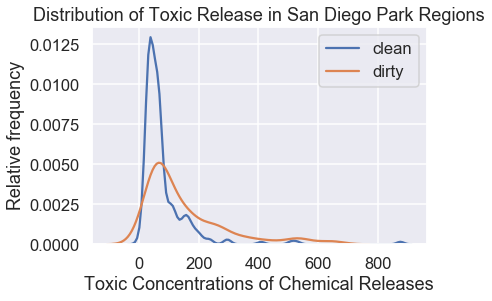

In [53]:
tox_dist = sns.distplot(df_stats.loc[(df_stats['is_clean'] == True) & (df_stats['tox_release'] < 1000)]['tox_release'], bins = 25 , label = 'clean', hist = False)
tox_dist2 = sns.distplot(df_stats.loc[(df_stats['is_clean'] == False) & (df_stats['tox_release'] < 1000)]['tox_release'], bins = 25, label= 'dirty', ax = tox_dist, hist = False)

tox_dist.set_title('Distribution of Toxic Release in San Diego Park Regions')
tox_dist.set_xlabel('Toxic Concentrations of Chemical Releases')
tox_dist.set_ylabel('Relative frequency')
plt.legend()

None

The distribution of toxic concentrations are relatively similar between clean and dirty parks. However, clean parks have a much higher density of parks in regions where the toxic release value is about 50.

### Poverty Analysis

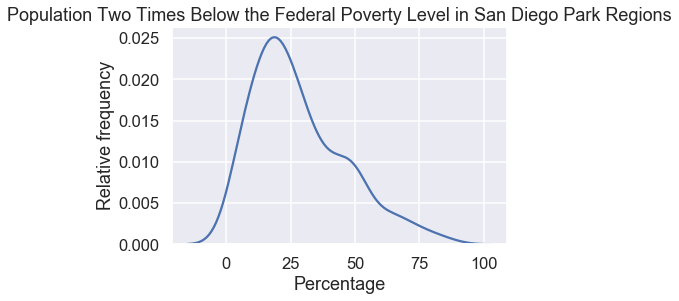

In [54]:
pov_dist = sns.distplot(df_stats['poverty'], bins = 25, hist = False)

pov_dist.set_title('Population Two Times Below the Federal Poverty Level in San Diego Park Regions')
pov_dist.set_xlabel('Percentage')
pov_dist.set_ylabel('Relative frequency')

None

The percentage of the population two times below the federal poverty level that occurs most often is a little below 25%. I would expect to see a lower percentage rather than a higher one, but there are more values in the higher percentages than I expected. Let's look at the outliers where there is a high percentage of the population in poverty.

In [55]:
df_stats[df_stats['poverty'] > 75]

,name,lat,lon,score,p_range,pesticides,tox_release,poverty,scale,is_clean
94,Colina Del Sol Park & Rec Center,32.752909,-117.080356,30.07,61-65%,0.0,63.578296,84.891835,6,False
95,Colina Park Golf Course,32.751038,-117.083427,30.07,61-65%,0.0,63.578296,84.891835,6,False
98,Memorial Skate Park,32.698942,-117.129661,52.48,91-95%,0.0,539.959423,76.470588,9,False
240,North Park Produce,32.754921,-117.116531,30.26,61-65%,0.0,64.138190,79.465860,6,False
247,Dorothy Petway Neighborhood Park,32.692970,-117.118942,55.61,96-100% (highest scores),0.0,644.541122,76.636392,9,False


The parks in these regions have the highest percentage of their population in poverty, with Colina Park being in the region with the most population in poverty. They are all considered dirty parks based on their CES 2.0 score percentiles, where they have a moderately high pollution burden. Especially Dorothy Petway Neighborhood Park, being in a region that is considered to have one of the highest pollution burdens. Let's if there is a difference between the distribution of clean parks and dirty parks when it comes to poverty levels.

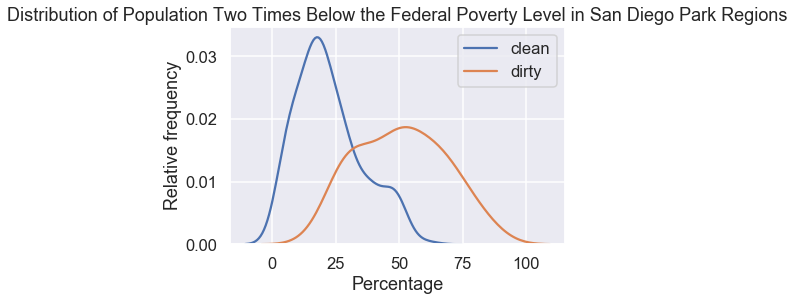

In [56]:
pov_dist = sns.distplot(df_stats.loc[df_stats['is_clean'] == True]['poverty'], bins = 25 , label = 'clean', hist = False)
pov_dist2 = sns.distplot(df_stats.loc[df_stats['is_clean'] == False]['poverty'], bins = 25, label= 'dirty', ax = pov_dist, hist = False)

pov_dist.set_title('Distribution of Population Two Times Below the Federal Poverty Level in San Diego Park Regions')
pov_dist.set_xlabel('Percentage')
pov_dist.set_ylabel('Relative frequency')
plt.legend()

None

I can see that most clean parks are in regions where the poverty percentage is about 20%. In contrast, most dirty parks are in regions where the poverty percentage is at 50%. Most dirty parks have more than double the population percentage of those in poverty than most clean parks.

### Relationship between Score and Other Variables

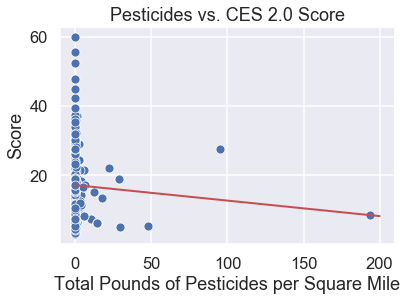

In [57]:
score_pest = sns.scatterplot(x = 'pesticides', y = 'score', data = df_stats)

poly = np.polyfit(df_stats['pesticides'].fillna(0), \
                  df_stats['score'].fillna(0), deg=1)
score_pest.plot(np.linspace(0, 200), np.poly1d(poly)(np.linspace(0, 200)), color = 'r', linewidth = 2)

score_pest.set_title('Pesticides vs. CES 2.0 Score')
score_pest.set_xlabel('Total Pounds of Pesticides per Square Mile')
score_pest.set_ylabel('Score')

None

There are some outliers that are skewing the results. Let's remove some outliers to see if it makes any difference.

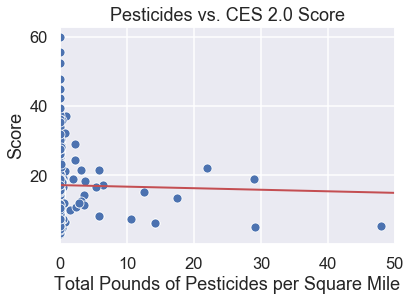

In [58]:
score_pest = sns.scatterplot(x = 'pesticides', y = 'score', data = df_stats)

poly = np.polyfit(df_stats['pesticides'].fillna(0), \
                  df_stats['score'].fillna(0), deg=1)
score_pest.plot(np.linspace(0, 50), np.poly1d(poly)(np.linspace(0, 50)), color = 'r', linewidth = 2)

score_pest.set_title('Pesticides vs. CES 2.0 Score')
score_pest.set_xlabel('Total Pounds of Pesticides per Square Mile')
score_pest.set_ylabel('Score')

plt.xlim(0, 50)

None

With the removal of some outliers, we can see that there's a slight negative linear relationship between pesticide levels and score. Let's try removing even more outliers.

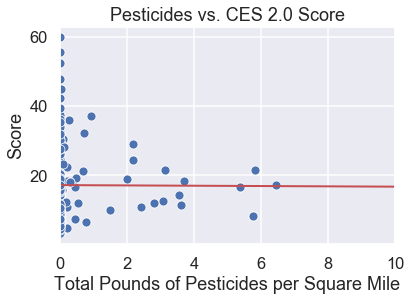

In [59]:
score_pest = sns.scatterplot(x = 'pesticides', y = 'score', data = df_stats)

poly = np.polyfit(df_stats['pesticides'].fillna(0), \
                  df_stats['score'].fillna(0), deg=1)
score_pest.plot(np.linspace(0, 10), np.poly1d(poly)(np.linspace(0, 10)), color = 'r', linewidth = 2)

score_pest.set_title('Pesticides vs. CES 2.0 Score')
score_pest.set_xlabel('Total Pounds of Pesticides per Square Mile')
score_pest.set_ylabel('Score')

plt.xlim(0, 10)

None

One more time.

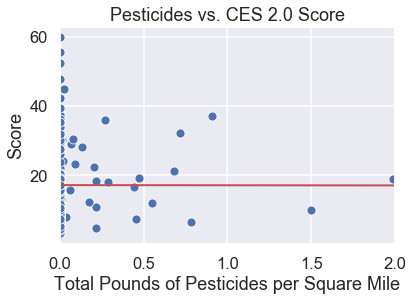

In [60]:
score_pest = sns.scatterplot(x = 'pesticides', y = 'score', data = df_stats)

poly = np.polyfit(df_stats['pesticides'].fillna(0), \
                  df_stats['score'].fillna(0), deg=1)
score_pest.plot(np.linspace(0, 2), np.poly1d(poly)(np.linspace(0, 2)), color = 'r', linewidth = 2)

score_pest.set_title('Pesticides vs. CES 2.0 Score')
score_pest.set_xlabel('Total Pounds of Pesticides per Square Mile')
score_pest.set_ylabel('Score')

plt.xlim(0, 2)

None

We can see that there is virtually no relationship between pesticide levels and CES 2.0 Score with the removal of outliers. Let's take a look at the relationship between toxic concentration and CES 2.0 score now.

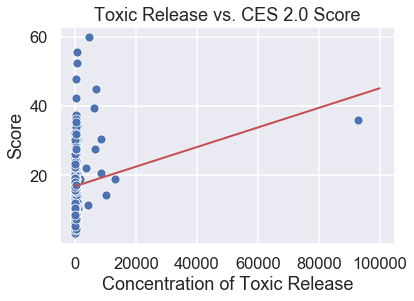

In [61]:
score_tox = sns.scatterplot(x = 'tox_release', y = 'score', data = df_stats)

poly = np.polyfit(df_stats['tox_release'].fillna(0), \
                  df_stats['score'].fillna(0), deg=1)
score_tox.plot(np.linspace(0, 100000), np.poly1d(poly)(np.linspace(0, 100000)), color = 'r', linewidth = 2)

score_tox.set_title('Toxic Release vs. CES 2.0 Score')
score_tox.set_xlabel('Concentration of Toxic Release')
score_tox.set_ylabel('Score')

None

Let's remove the outlier so that the line is more accurate.

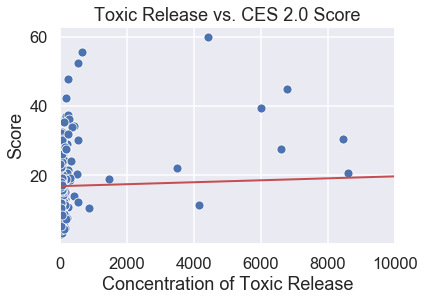

In [62]:
score_tox = sns.scatterplot(x = 'tox_release', y = 'score', data = df_stats)

poly = np.polyfit(df_stats['tox_release'].fillna(0), \
                  df_stats['score'].fillna(0), deg=1)
score_tox.plot(np.linspace(0, 10000), np.poly1d(poly)(np.linspace(0, 10000)), color = 'r', linewidth = 2)


score_tox.set_title('Toxic Release vs. CES 2.0 Score')
score_tox.set_xlabel('Concentration of Toxic Release')
score_tox.set_ylabel('Score')

plt.xlim(0, 10000)

None

Let's remove even more outliers.

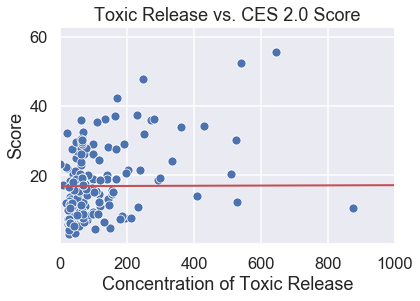

In [63]:
score_tox = sns.scatterplot(x = 'tox_release', y = 'score', data = df_stats)

poly = np.polyfit(df_stats['tox_release'].fillna(0), \
                  df_stats['score'].fillna(0), deg=1)
score_tox.plot(np.linspace(0, 1000), np.poly1d(poly)(np.linspace(0, 1000)), color = 'r', linewidth = 2)

score_tox.set_title('Toxic Release vs. CES 2.0 Score')
score_tox.set_xlabel('Concentration of Toxic Release')
score_tox.set_ylabel('Score')

plt.xlim(0, 1000)

None

One more reduction.

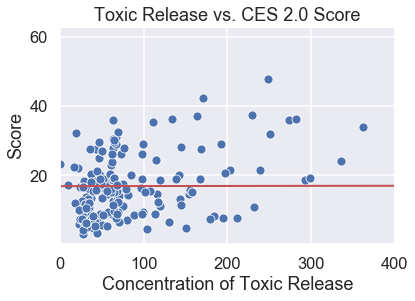

In [64]:
score_tox = sns.scatterplot(x = 'tox_release', y = 'score', data = df_stats)

poly = np.polyfit(df_stats['tox_release'].fillna(0), \
                  df_stats['score'].fillna(0), deg=1)
score_tox.plot(np.linspace(0, 400), np.poly1d(poly)(np.linspace(0, 400)), color = 'r', linewidth = 2)

score_tox.set_title('Toxic Release vs. CES 2.0 Score')
score_tox.set_xlabel('Concentration of Toxic Release')
score_tox.set_ylabel('Score')

plt.xlim(0, 400)

None

I can see that there is no relationship between toxic concentration and CES 2.0 score as well. Now let's see the relationship between poverty and CES 2.0 score.

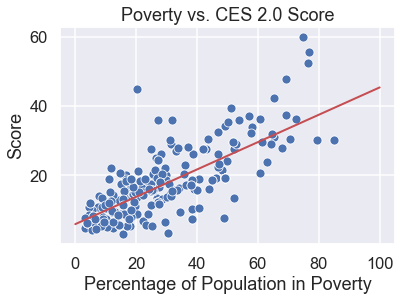

In [65]:
score_pov = sns.scatterplot(x = 'poverty', y = 'score', data = df_stats)

poly = np.polyfit(df_stats['poverty'].fillna(0), \
                  df_stats['score'].fillna(0), deg=1)
score_pov.plot(np.linspace(0,100), np.poly1d(poly)(np.linspace(0,100)), color = 'r', linewidth = 2)

score_pov.set_title('Poverty vs. CES 2.0 Score')
score_pov.set_xlabel('Percentage of Population in Poverty')
score_pov.set_ylabel('Score')

None

There is a definite positive relationship between poverty and CES 2.0 score. As the percentage of the population in poverty increases, the CES 2.0 score increases. This means that parks in regions of higher poverty are likely to have more of a pollution burden.

# Ethics

### Question

The question focuses on the regional data of clean/dirty parks and doesn't violate ethical concerns. It doesn't focus on or exclude particular populations.

### Data

The parks dataset just had public yelp information on establishments around San Diego. There's no personal information from reviewers so there's no concern of a privacy leak from this dataset. The CES dataset had information from the California Office of Environmental Health Hazard Assessment(OEHHA) and is available to the public on their website https://oehha.ca.gov/. The dataset contains statistics about census tracts around California related to their pollution burden and demographics, and would not reveal any personal info of the people living in these census tracts. It is unsure as to how OEHHA collects this data, but the statistics are of regional data, and would require collecting things like water samples or testing the air.

### Biases

There shouldn't be any biases because the CES data takes into account the demographics of the people living in each census tract. The yelp data might be biased in regards to rating from reviews, but I didn't use the rating in my analysis and it wouldn't affect my analysis.

### Analysis

My analysis only looks at trends within the data and would be difficult to be used in any discrimination to happen because there's no personal information found.

# Conclusion & Discussion

I wanted to compare/contrast the regions in San Diego that had clean parks and dirty parks. I used two datasets, one that had parks with their latitude/longitude and data from CalEnviroScreen(CES) about census tracts(regions) all over California. I merged the parks data with the CES data based on the latitude/longitude. From this, I was able to explore the the data of each region based on the park that was in the region. From the CES stats, I chose to focus on the CES 2.0 score, toxic release, pesticide use, and poverty of a region because I thought those categories clearly demonstrated a region at face value in terms of their cleanliness. I plotted each variable on a density plot as a overall dataset before splitting the distribution between regions with clean parks and regions with dirty parks. 

My hypothesis on the CES 2.0 score was correct, with most clean parks being in regions that had a lower score than the regions of dirty parks. I was wrong on my hypothesis about the use of pesticides, that clean parks would be in regions that have less pesticide use than the regions of dirty parks. Regions with clean parks actually had more total pounds of pesticides used per square mile which does make sense when I think about how pesticides kill bugs that harm plants. I was also wrong on my hypothesis about toxic release, that regions with dirty parks would have more toxic release. I was surprised to find that regions with dirty parks had relatively had similar concentrations of toxic release as regions with clean parks. However, regions with clean parks had a higher relative frequency at the concentration point. My hypothesis on poverty was correct. There was a clear divide in poverty percentage between regions with clean parks and regions with dirty parks. Most regions with dirty parks had more than double the percentage of the population in poverty than most regions with clean parks.

There were some obvious limitations with the project. The CES dataset had 52 columns with more categories that I could have explored to get a better sense of regional similarities/differences. Another limitation was the lack of clarification on the CES 2.0 score and what it truly meant. The CES 2.0 score is based on the pollution burden and population characteristics of a census tract, and put on a percentile range. The percentile range was from 0% to 100% and it was difficult to classify what would be considered clean/dirty. Designating 0%-50% as clean and 51%-100% as dirty may have not been the best way to analyze the data. If given enough more time to do the project, I would've like to use SVM to classify each park as clean and dirty based on their CES data. The data was chosen by the instructor so I had to alter the project to fit the data and work with the data I had.

This project could be used to show the disparity of parks in low-income and high-income neighborhoods. The project can be expanded to explore the different statistics from the CES dataset to show potential differences that are harmful and the necessity for aid in these low-income neighborhoods.